In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed
from keras.optimizers import Adam
from keras.layers.recurrent import LSTM
import numpy
import pandas as pd
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
# -*-coding:utf-8 -*-

In [3]:
datapath = '/home/sherlock/code_lib/df.csv'

In [4]:
dataframe = pd.read_csv(datapath, sep =',')

In [5]:
print dataframe.shape
print dataframe.info()

(1869, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 2 columns):
dtdate      1869 non-null object
sesionNo    1869 non-null float64
dtypes: float64(1), object(1)
memory usage: 29.3+ KB
None


In [6]:
df4 = dataframe

In [7]:
%matplotlib inline

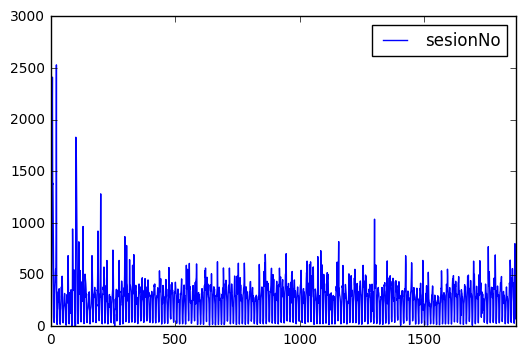

In [8]:
df4.plot(kind='line',figsize=(6,4))

In [9]:
test = df4['sesionNo']

In [10]:
#test

In [11]:
dataset =test.values

In [12]:
dataset = dataset.astype('float32')

In [13]:
dataset = dataset.reshape((1869,1))

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
dataset = dataset.reshape(1869)

In [16]:
dataset.shape

(1869,)

In [17]:
dataset[0:5]

array([ 0.24259186,  0.04938759,  0.01698933,  0.03516397,  0.11260371], dtype=float32)

In [18]:
test_length = 180
train_length = len(dataset)-test_length
train_dataset = dataset[:train_length]

In [19]:
feature_length = 84
seq_length = 40
s = 24 #means shift
step = 1

In [20]:
import math

In [21]:
train_dataset_len = len(train_dataset)

In [22]:
nb_samples = math.ceil((len(train_dataset) - feature_length - s) /seq_length)
nb_samples = int(nb_samples)
nb_samples

40

In [23]:
#indimension = nb_samples*seq_length+s+feature_length
#indimension

In [24]:
X = numpy.zeros((nb_samples,seq_length,feature_length))
Y = numpy.zeros((nb_samples,seq_length,feature_length))
#datasetin = dataset[-indimension:]
#len(datasetin)
Y.shape

(40, 40, 84)

In [25]:
train_dataset = train_dataset.reshape(train_dataset_len)

In [26]:
'''def generate_data(nb_samples,seq_len,feature_len):
    for i in range(nb_samples):
        for j in range(seq_len//2):
            X[i,j] = dataset[i*seq_len+j*s:i*seq_len+j*s+feature_len]
            # predict next s element
            Y[i,j] = dataset[i*seq_len+j*s+s:i*seq_len+j*s+feature_len+s]
    return X, Y'''

'def generate_data(nb_samples,seq_len,feature_len):\n    for i in range(nb_samples):\n        for j in range(seq_len//2):\n            X[i,j] = dataset[i*seq_len+j*s:i*seq_len+j*s+feature_len]\n            # predict next s element\n            Y[i,j] = dataset[i*seq_len+j*s+s:i*seq_len+j*s+feature_len+s]\n    return X, Y'

In [27]:
# shift = s =24
step = 1

In [28]:
# if step =1 ,then the nb_samples should change 


In [29]:
def generate_train_data(nb_samples,seq_len,feature_len):
    for i in range(nb_samples):
        for j in range(seq_len):
            for k in range(feature_len):
                if i*seq_len+j*step+s+k >= len(train_dataset):
                    break
                else:
                    X[i,j,k]=train_dataset[i*seq_len+j*step+k]
            #X[i,j] = dataset[i*seq_len+j*s:i*seq_len+j*s+feature_len]
            # predict next s element
                    Y[i,j,k] = train_dataset[i*seq_len+j*step+s+k]
            
            #Y[i,j] = dataset[i*seq_len+j*s+s:i*seq_len+j*s+feature_len+s]
    return X, Y

In [30]:
train_X,train_Y = generate_train_data(nb_samples,seq_length,feature_length)

In [31]:
train_X.shape

(40, 40, 84)

In [32]:
train_Y.shape

(40, 40, 84)

In [78]:
#SIMPLE NN
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(40,84)))
#model.add(Dense(32,input_dim=4))
model.add(TimeDistributed(Dense(256),input_shape=(40,84)))
model.add(TimeDistributed(Dense(256)))
#model.add(TimeDistributed(Dense(256)))
model.add(TimeDistributed(Dense(feature_length)))
#model.add(Activation('tanh'))
model.compile(loss='mean_squared_error', optimizer=Adam())

In [79]:
model.fit(train_X, train_Y, nb_epoch=2000, batch_size=30)

Epoch 1/2000
40/40 [==============================] - 0s - loss: 0.0290     
Epoch 2/2000
40/40 [==============================] - 0s - loss: 0.0136     
Epoch 3/2000
40/40 [==============================] - 0s - loss: 0.0076     
Epoch 4/2000
40/40 [==============================] - 0s - loss: 0.0059     
Epoch 5/2000
40/40 [==============================] - 0s - loss: 0.0051     
Epoch 6/2000
40/40 [==============================] - 0s - loss: 0.0045     
Epoch 7/2000
40/40 [==============================] - 0s - loss: 0.0041     
Epoch 8/2000
40/40 [==============================] - 0s - loss: 0.0038     
Epoch 9/2000
40/40 [==============================] - 0s - loss: 0.0035     
Epoch 10/2000
40/40 [==============================] - 0s - loss: 0.0032     
Epoch 11/2000
40/40 [==============================] - 0s - loss: 0.0030     
Epoch 12/2000
40/40 [==============================] - 0s - loss: 0.0028     
Epoch 13/2000
40/40 [==============================] - 0s - loss: 0.0027 

In [82]:
import math
import scipy

In [83]:
# Estimate model performance
trainScore = model.evaluate(train_X, train_Y, verbose=0)
print('Train Score: %.5f MSE (%.5f RMSE)' % (trainScore, math.sqrt(trainScore)))

Train Score: 0.00008 MSE (0.00875 RMSE)


In [84]:
test_dataset = dataset[-test_length:]

In [85]:
len(test_dataset)

180

### ! so the test_length should larger than feature_length+shift

In [86]:
t_s = (len(test_dataset) - feature_length - s) /seq_length
t_s

1.8

In [87]:
test_samples = math.ceil((len(test_dataset) - feature_length - s) /seq_length)
#test_samples = int(test_samples) 
test_samples = int(test_samples)

In [88]:
t_X = numpy.zeros((test_samples,seq_length,feature_length))
t_Y = numpy.zeros((test_samples,seq_length,feature_length))

In [89]:
t_X.shape

(2, 40, 84)

In [90]:
def generate_data_test(test_samples,seq_len,feature_len):
    for i in range(test_samples):
        for j in range(seq_len):
            for k in range(feature_len):
                if i*seq_len+j*step+s+k >= len(test_dataset): #t_X 24 shorter than the t_Y
                    break
                else:
                    t_X[i,j,k]=test_dataset[i*seq_len+j*step+k] 
            #X[i,j] = dataset[i*seq_len+j*s:i*seq_len+j*s+feature_len]
            # predict next s element
                    t_Y[i,j,k] = test_dataset[i*seq_len+j*step+s+k]
            
            #Y[i,j] = dataset[i*seq_len+j*s+s:i*seq_len+j*s+feature_len+s]
    return t_X, t_Y

In [91]:
test_X,test_Y = generate_data_test(test_samples , seq_length, feature_length)

In [92]:
predict_range = test_X

In [93]:
test_ns,test_sq,ft = test_X.shape
print test_ns ,test_sq

2 40


In [94]:
step  = 1

In [95]:
def hstackrange(p_ns,p_sq,matrix_range):
    range_sq =[]
    # count = 60
    for i in range (p_ns):
        for j in range(p_sq):
            if i==0 and j ==0:
                range_sq1 = matrix_range[i,j]
            else:
                range_sq1 = matrix_range[i,j,-step:]
            #j = j+1
            range_sq = numpy.hstack((range_sq,range_sq1))
            # count = count + 1
    return range_sq
    

In [96]:
test_X[0,1,-1:]

array([ 0.14855787])

In [97]:
#test_X_sq, t_count = hstackrange(p_ns=test_ns,p_sq=test_sq,matrix_range = test_X)
test_X_sq = hstackrange(p_ns=test_ns,p_sq=test_sq,matrix_range = test_X)

In [98]:
#t_count
len(test_X_sq)

163

In [99]:
test_X[1,-3:,]

array([[ 0.01422363,  0.04148558,  0.1070723 ,  0.12682734,  0.13789016,
         0.14974318,  0.14500198,  0.14855787,  0.13986567,  0.1090478 ,
         0.12366653,  0.02291584,  0.01501383,  0.02686685,  0.08178585,
         0.18451205,  0.14263137,  0.1635717 ,  0.15013827,  0.18095614,
         0.27340972,  0.19280916,  0.12564203,  0.03239826,  0.01145792,
         0.03555907,  0.09403398,  0.13670486,  0.13275385,  0.15448439,
         0.14026076,  0.11615962,  0.11892533,  0.12169103,  0.08731727,
         0.02568155,  0.01382853,  0.02015014,  0.08810747,  0.13117345,
         0.13472936,  0.1667325 ,  0.16554721,  0.1564599 ,  0.17937574,
         0.19083366,  0.13275385,  0.04899249,  0.01856973,  0.04069538,
         0.1094429 ,  0.09798498,  0.09996048,  0.13393915,  0.08771236,
         0.10154089,  0.11932042,  0.11102331,  0.09363887,  0.02726195,
         0.01027262,  0.01738443,  0.05649941,  0.07743975,  0.12485183,
         0.15092848,  0.12682734,  0.10035559,  0.1

In [109]:
test_X_sq

array([ 0.11299881,  0.12406163,  0.11655471,  0.07190833,  0.01422363,
        0.00434611,  0.02133544,  0.08534176,  0.12880284,  0.16317661,
        0.24970366,  0.19241406,  0.16949822,  0.19913077,  0.1548795 ,
        0.10430659,  0.01935994,  0.01027262,  0.02647175,  0.09087317,
        0.11457922,  0.11378901,  0.15369418,  0.12919794,  0.12050573,
        0.105887  ,  0.10509679,  0.12524693,  0.04583168,  0.01382853,
        0.0513631 ,  0.19715527,  0.11813512,  0.13591465,  0.1604109 ,
        0.25128406,  0.14223626,  0.12524693,  0.13670486,  0.1667325 ,
        0.09403398,  0.03516397,  0.08573686,  0.13235874,  0.05057289,
        0.11299881,  0.12287633,  0.12366653,  0.10193599,  0.07941525,
        0.06321612,  0.10509679,  0.02449625,  0.01580403,  0.02884235,
        0.09284867,  0.105887  ,  0.11418411,  0.1619913 ,  0.14263137,
        0.12248123,  0.12564203,  0.12564203,  0.07269853,  0.02015014,
        0.01066772,  0.02489135,  0.08099565,  0.11181351,  0.30

In [110]:
test_dataset

array([ 0.11299881,  0.12406163,  0.11655471,  0.07190833,  0.01422363,
        0.00434611,  0.02133544,  0.08534176,  0.12880284,  0.16317661,
        0.24970366,  0.19241406,  0.16949822,  0.19913077,  0.1548795 ,
        0.10430659,  0.01935994,  0.01027262,  0.02647175,  0.09087317,
        0.11457922,  0.11378901,  0.15369418,  0.12919794,  0.12050573,
        0.105887  ,  0.10509679,  0.12524693,  0.04583168,  0.01382853,
        0.0513631 ,  0.19715527,  0.11813512,  0.13591465,  0.1604109 ,
        0.25128406,  0.14223626,  0.12524693,  0.13670486,  0.1667325 ,
        0.09403398,  0.03516397,  0.08573686,  0.13235874,  0.05057289,
        0.11299881,  0.12287633,  0.12366653,  0.10193599,  0.07941525,
        0.06321612,  0.10509679,  0.02449625,  0.01580403,  0.02884235,
        0.09284867,  0.105887  ,  0.11418411,  0.1619913 ,  0.14263137,
        0.12248123,  0.12564203,  0.12564203,  0.07269853,  0.02015014,
        0.01066772,  0.02489135,  0.08099565,  0.11181351,  0.30

In [111]:
test_dataset

array([ 0.11299881,  0.12406163,  0.11655471,  0.07190833,  0.01422363,
        0.00434611,  0.02133544,  0.08534176,  0.12880284,  0.16317661,
        0.24970366,  0.19241406,  0.16949822,  0.19913077,  0.1548795 ,
        0.10430659,  0.01935994,  0.01027262,  0.02647175,  0.09087317,
        0.11457922,  0.11378901,  0.15369418,  0.12919794,  0.12050573,
        0.105887  ,  0.10509679,  0.12524693,  0.04583168,  0.01382853,
        0.0513631 ,  0.19715527,  0.11813512,  0.13591465,  0.1604109 ,
        0.25128406,  0.14223626,  0.12524693,  0.13670486,  0.1667325 ,
        0.09403398,  0.03516397,  0.08573686,  0.13235874,  0.05057289,
        0.11299881,  0.12287633,  0.12366653,  0.10193599,  0.07941525,
        0.06321612,  0.10509679,  0.02449625,  0.01580403,  0.02884235,
        0.09284867,  0.105887  ,  0.11418411,  0.1619913 ,  0.14263137,
        0.12248123,  0.12564203,  0.12564203,  0.07269853,  0.02015014,
        0.01066772,  0.02489135,  0.08099565,  0.11181351,  0.30

In [112]:
test_y_ns , test_y_sq , test_y_fts = test_Y.shape
print test_y_ns, test_y_sq

2 40


In [113]:
test_Y_sq = hstackrange(p_ns=test_y_ns,p_sq=test_y_sq,matrix_range = test_Y)

In [114]:
test_Y_sq

array([ 0.12050573,  0.105887  ,  0.10509679,  0.12524693,  0.04583168,
        0.01382853,  0.0513631 ,  0.19715527,  0.11813512,  0.13591465,
        0.1604109 ,  0.25128406,  0.14223626,  0.12524693,  0.13670486,
        0.1667325 ,  0.09403398,  0.03516397,  0.08573686,  0.13235874,
        0.05057289,  0.11299881,  0.12287633,  0.12366653,  0.10193599,
        0.07941525,  0.06321612,  0.10509679,  0.02449625,  0.01580403,
        0.02884235,  0.09284867,  0.105887  ,  0.11418411,  0.1619913 ,
        0.14263137,  0.12248123,  0.12564203,  0.12564203,  0.07269853,
        0.02015014,  0.01066772,  0.02489135,  0.08099565,  0.11181351,
        0.30501777,  0.18451205,  0.1548795 ,  0.17977084,  0.2094034 ,
        0.16317661,  0.12406163,  0.04938759,  0.01422363,  0.04148558,
        0.1070723 ,  0.12682734,  0.13789016,  0.14974318,  0.14500198,
        0.14855787,  0.13986567,  0.1090478 ,  0.12366653,  0.02291584,
        0.01501383,  0.02686685,  0.08178585,  0.18451205,  0.14

In [115]:
test_X_nonzerocount = len(test_dataset)-s
test_X_nonzerocount

#test_X_sq

156

In [116]:
test_Y_range = test_Y_sq [:test_X_nonzerocount]
test_Y_range

array([ 0.12050573,  0.105887  ,  0.10509679,  0.12524693,  0.04583168,
        0.01382853,  0.0513631 ,  0.19715527,  0.11813512,  0.13591465,
        0.1604109 ,  0.25128406,  0.14223626,  0.12524693,  0.13670486,
        0.1667325 ,  0.09403398,  0.03516397,  0.08573686,  0.13235874,
        0.05057289,  0.11299881,  0.12287633,  0.12366653,  0.10193599,
        0.07941525,  0.06321612,  0.10509679,  0.02449625,  0.01580403,
        0.02884235,  0.09284867,  0.105887  ,  0.11418411,  0.1619913 ,
        0.14263137,  0.12248123,  0.12564203,  0.12564203,  0.07269853,
        0.02015014,  0.01066772,  0.02489135,  0.08099565,  0.11181351,
        0.30501777,  0.18451205,  0.1548795 ,  0.17977084,  0.2094034 ,
        0.16317661,  0.12406163,  0.04938759,  0.01422363,  0.04148558,
        0.1070723 ,  0.12682734,  0.13789016,  0.14974318,  0.14500198,
        0.14855787,  0.13986567,  0.1090478 ,  0.12366653,  0.02291584,
        0.01501383,  0.02686685,  0.08178585,  0.18451205,  0.14

In [117]:
X_predict = model.predict(predict_range)

In [118]:
pred_ns,pred_sq,pred_ft=X_predict.shape
print pred_ns, pred_sq, pred_ft

2 40 84


In [119]:
X_predict_sq  =  hstackrange(p_ns=pred_ns,p_sq=pred_sq,matrix_range = X_predict)

In [120]:
X_predict_sq

array([ 0.13208167,  0.09742608,  0.10541849,  0.13070956,  0.04370826,
        0.02907094,  0.05509875,  0.17333367,  0.07513171,  0.13352661,
        0.14804924,  0.2333501 ,  0.11847751,  0.13255616,  0.11963416,
        0.15026893,  0.06744107,  0.04195517,  0.08378656,  0.08312634,
        0.03151668,  0.13355021,  0.14181399,  0.12482668,  0.1191237 ,
        0.08723528,  0.0791496 ,  0.12043911,  0.02228111,  0.04454848,
        0.03588504,  0.10187303,  0.08595131,  0.11276425,  0.17778058,
        0.1377904 ,  0.13516322,  0.13433014,  0.09055922,  0.07186189,
        0.03509576,  0.05258743,  0.05099121,  0.08033053,  0.11147799,
        0.26782075,  0.13676602,  0.15511225,  0.17728983,  0.18918096,
        0.12331833,  0.10126864,  0.05840722,  0.02776898,  0.058474  ,
        0.09876484,  0.10839266,  0.14635459,  0.17106062,  0.13926838,
        0.15681523,  0.13072333,  0.12728815,  0.11249937,  0.05988298,
        0.02700742,  0.01395398,  0.07553181,  0.1090236 ,  0.14

In [121]:
X_predict_sq
X_predict_range = X_predict_sq[:test_X_nonzerocount]

In [122]:
from scipy.ndimage.interpolation import shift

In [123]:
#bag the shift flow into a function
''''def shift_pred_range(count,s,X_predict_range): #11.15 X_predict do not need shift to fit the test_Y 
    b = numpy.zeros(count+s)
    b[:-s] = X_predict_range[:]
    X_predict_shift=  shift(b,s, cval = numpy.NaN)
    return X_predict_shift'''

"'def shift_pred_range(count,s,X_predict_range): #11.15 X_predict do not need shift to fit the test_Y \n    b = numpy.zeros(count+s)\n    b[:-s] = X_predict_range[:]\n    X_predict_shift=  shift(b,s, cval = numpy.NaN)\n    return X_predict_shift"

In [124]:
X_predict_shift = shift_pred_range(count = test_X_nonzerocount, s = 24, X_predict_range = X_predict_range)

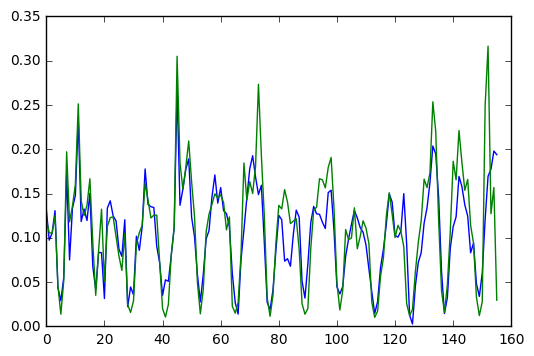

In [127]:
plt.plot( X_predict_range,  label= 'predict')
plt.plot( test_Y_range, label= 'true' )
plt.show()